# Final Submission for Mod 1 Project

Created by Aren Carpenter & Albert Um
Data Science Cohort 06/22/20

Using data science to explore the movie industry and provide recommendations for Microsoft to enter the film industry.

This notebook contains the following:
   - EDA : Movie Revenue over Time
   - EDA : ROI for Budget
   - EDA : User Rating and Revenue
   - EDA : Genres and Revenue
   
Key insights are provided with each visualization and are summed up in our ReadMe file. 

Thank you.

# Exploratory Data Analysis: Movie Revenue over Time

We want to start by getting a sense of how movie revenue has changed over time. As movies became a more popular and mainstream entertainment source both movie budgets and revenue have exploded. Let's take a look. 

### Libraries to import:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("muted")
%matplotlib inline

### Import Data:

We'll start by importing our The Movie DB dataset. 

In [2]:
data = pd.read_csv('zippedData/tn.movie_budgets.csv.gz') # Import our data.
data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


### Cleaning Data:

#### Changing Release Date to Year: 

We don't need the full date of release for each movie. To keep it simple, lets select just the year.

In [3]:
data['Release_Year'] = pd.DatetimeIndex(data['release_date']).year # The release_date column is formatted in a way
                                                                   # that pandas can recognize so use .year method to
                                                                   # make a new Release_Year column.

#### Recasting Worldwide Gross as an Integer:

Currently our worldwide_gross column in an object 'O' datatype due to the string characters -- dollar signs and commas.

In [4]:
data.worldwide_gross.dtype

dtype('O')

Let's strip the dollar signs and remove commas. Then we can recast the column as a numerical value, 'int64'.

In [5]:
data['worldwide_gross'] = data['worldwide_gross'].str.strip('$')        # Strip dollar signs. 
data['worldwide_gross'] = data['worldwide_gross'].str.replace(',', '')  # Remove commas.
data['worldwide_gross'] = data['worldwide_gross'].astype('int64')       # Recast as numerical data type. 

Type check to confirm our new column data type.

In [6]:
data.worldwide_gross.dtype

dtype('int64')

#### Re-examine our data:

As we can see, our worldwide_gross column is now just numbers and we have a new Release_Year column. 

In [7]:
data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Release_Year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875",1045663875,2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350",149762350,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1403013963,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382",1316721747,2017
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,0,2018
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482",240495,1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338",1338,2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,0,2015


### Visualization: 

Now we can start to visualize. We selected a regplot so we can examine the univariate distributions of each variable in addition to the scatter plot between them. We used manually selected y-axis ticks to highlight the exponential growth of worldwide revenue. 

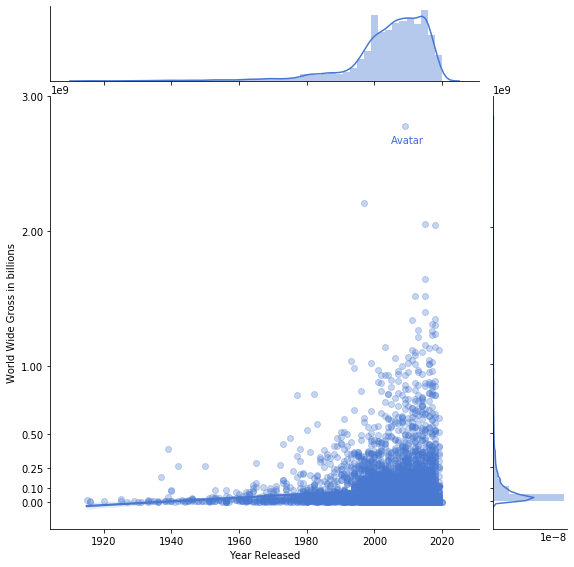

In [8]:
graph = sns.jointplot(x = 'Release_Year', y = 'worldwide_gross', data = data, kind = 'reg', height = 8, scatter_kws={'alpha':0.3})
graph.set_axis_labels('Year Released', 'World Wide Gross in billions') # Set axis labels.
graph.ax_joint.set_yticks([0, 100000000, 250000000, 500000000, 1000000000, 2000000000, 3000000000]) # Set custom ticks.
plt.text(2005,2650000000,'Avatar', color = 'royalblue') # Add text for Avatar.
sns.despine()

Movie revenue has grown exponentially in the last hundred years. The top distribution plot of movies per year also illustrate the growing number of films produced every year. As the revenue has increased, producers are eager to take a slice of the earnings. However, the distribution plot of movies per revenue highlight the fact that the vast majority of films make very little money (~ $100,000,000) compared to blockbusters like Avatar, which earned 2.7 billion. 

### Insights:

There has been a drastic increase in the potential earnings from a feature film, especially in the last twenty years. A handful of films have worldwide earnings of more than 1.5 billion dollars. However, the vast majority of films have earned less than 100 million.

======================================================================================================================

# Exploratory Data Analysis: ROI for Budget

While we've seen that movie revenue has been increasing over time, movies are also more expensive to make now than they used to be. With the advent of CGI and greenscreen technology, blockbuster budgets have also increased exponentially. Let's see how that affects a movie's earning potential.

### Libraries to import:

In [9]:
import pandas as pd
import seaborn as sns
sns.set_palette("muted")
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Concatenate Scraped Movie Data by Decade:

Let's start by creating a dataframe consisting of webscraped data from IMDB for the top 300 movies from each year going back to 1960. We will concatenate each decade's csv file into one. 

In [10]:
sixties = pd.read_csv('zippedData/1960_1970.csv')

In [11]:
seventies = pd.read_csv('zippedData/1971_1980.csv')

In [12]:
eighties = pd.read_csv('zippedData/1981_1990.csv')

In [13]:
nineties = pd.read_csv('zippedData/1991_2000.csv')

In [14]:
aughts = pd.read_csv('zippedData/2001_2010.csv')

In [15]:
teens = pd.read_csv('zippedData/2011_2020.csv')

In [16]:
combined = sixties.append([seventies, eighties, nineties, aughts, teens])
combined

,url,title,year,genre,gross_usa,budget,worldwide_gross,pg_rated,rating,rating_pop
0,https://www.imdb.com/title/tt0054215/,Psycho,1960,"['Horror', 'Mystery', 'Thriller']","$32,000,000","$806,947","$32,000,000",NaN,8.5,"580,863"
1,https://www.imdb.com/title/tt0054047/,The Magnificent Seven,1960,"['Action', 'Adventure', 'Western']",NaN,"$2,000,000",NaN,NaN,7.7,"85,315"
2,https://www.imdb.com/title/tt0054331/,Spartacus,1960,"['Adventure', 'Biography', 'Drama', 'History',...","$1,830,650","$12,000,000","$1,836,351",NaN,7.9,"120,895"
3,https://www.imdb.com/title/tt0053604/,The Apartment,1960,"['Comedy', 'Drama', 'Romance']",NaN,"$3,000,000","$177,066",NaN,8.3,"157,134"
4,https://www.imdb.com/title/tt0053917/,Home from the Hill,1960,"['Drama', 'Romance']",NaN,"$1,818,688",NaN,NaN,7.4,"2,864"
...,...,...,...,...,...,...,...,...,...,...
2995,https://www.imdb.com/title/tt7541720/,Music,2020,['Drama'],NaN,NaN,NaN,PG-13,NaN,NaN
2996,https://www.imdb.com/title/tt5867314/,The Empty Man,2020,"['Crime', 'Drama', 'Horror', 'Mystery', 'Thril...",NaN,NaN,NaN,R,NaN,NaN
2997,https://www.imdb.com/title/tt5714470/,Come Away,2020,"['Adventure', 'Drama', 'Fantasy']",NaN,NaN,NaN,NaN,6.6,27
2998,https://www.imdb.com/title/tt6559576/,Selfie Dad,2020,"['Comedy', 'Family']",NaN,NaN,NaN,PG,3.7,83


### Examine DataFrame and Preliminary Cleaning:

18,000 entries, not bad.

In [17]:
combined.shape

(18300, 10)

In [18]:
combined.columns

Index(['url', 'title', 'year', 'genre', 'gross_usa', 'budget',
       'worldwide_gross', 'pg_rated', 'rating', 'rating_pop'],
      dtype='object')

Because we are combining multiple dataframes they will have shared indexes. So let's reset the index and remove the old column this will create.

In [19]:
combined.reset_index(inplace=True)

In [20]:
combined = combined.drop('index', axis=1)

In [21]:
combined

,url,title,year,genre,gross_usa,budget,worldwide_gross,pg_rated,rating,rating_pop
0,https://www.imdb.com/title/tt0054215/,Psycho,1960,"['Horror', 'Mystery', 'Thriller']","$32,000,000","$806,947","$32,000,000",NaN,8.5,"580,863"
1,https://www.imdb.com/title/tt0054047/,The Magnificent Seven,1960,"['Action', 'Adventure', 'Western']",NaN,"$2,000,000",NaN,NaN,7.7,"85,315"
2,https://www.imdb.com/title/tt0054331/,Spartacus,1960,"['Adventure', 'Biography', 'Drama', 'History',...","$1,830,650","$12,000,000","$1,836,351",NaN,7.9,"120,895"
3,https://www.imdb.com/title/tt0053604/,The Apartment,1960,"['Comedy', 'Drama', 'Romance']",NaN,"$3,000,000","$177,066",NaN,8.3,"157,134"
4,https://www.imdb.com/title/tt0053917/,Home from the Hill,1960,"['Drama', 'Romance']",NaN,"$1,818,688",NaN,NaN,7.4,"2,864"
...,...,...,...,...,...,...,...,...,...,...
18295,https://www.imdb.com/title/tt7541720/,Music,2020,['Drama'],NaN,NaN,NaN,PG-13,NaN,NaN
18296,https://www.imdb.com/title/tt5867314/,The Empty Man,2020,"['Crime', 'Drama', 'Horror', 'Mystery', 'Thril...",NaN,NaN,NaN,R,NaN,NaN
18297,https://www.imdb.com/title/tt5714470/,Come Away,2020,"['Adventure', 'Drama', 'Fantasy']",NaN,NaN,NaN,NaN,6.6,27
18298,https://www.imdb.com/title/tt6559576/,Selfie Dad,2020,"['Comedy', 'Family']",NaN,NaN,NaN,PG,3.7,83


### Data Cleaning:

#### Check for Missing Values:

In [22]:
combined.isnull().sum()

url                    0
title                  0
year                   0
genre                  5
gross_usa           8893
budget              9547
worldwide_gross     8212
pg_rated           11061
rating               117
rating_pop           117
dtype: int64

#### Remove Dollar Signs and Commas from Currency Columns:

In [23]:
combined['worldwide_gross'] = combined['worldwide_gross'].str.strip('$')
combined['worldwide_gross'] = combined['worldwide_gross'].str.replace(',', '')

combined['budget'] = combined['budget'].str.strip('$')
combined['budget'] = combined['budget'].str.replace(',', '')

combined['gross_usa'] = combined['gross_usa'].str.strip('$')
combined['gross_usa'] = combined['gross_usa'].str.replace(',', '')

#### Remove Non-USD Reported Earnings:

We removed entries with non-USD reported budgets. This removed about 600 entries of the 18,000. Note that this does not remove all foreign films, just films produced by companies who did not report their budget in USD.

In [24]:
combined = combined[~combined['budget'].astype(str).str.startswith('SEK')] # Format is redefine the column with all
combined = combined[~combined['budget'].astype(str).str.startswith('NOK')] # entries EXCEPT where the entry starts
combined = combined[~combined['budget'].astype(str).str.startswith('KRW')] # with the specified currency string.
combined = combined[~combined['budget'].astype(str).str.startswith('SGD')]
combined = combined[~combined['budget'].astype(str).str.startswith('THB')]
combined = combined[~combined['budget'].astype(str).str.startswith('JPY')]
combined = combined[~combined['budget'].astype(str).str.startswith('HUF')]
combined = combined[~combined['budget'].astype(str).str.startswith('INR')]
combined = combined[~combined['budget'].astype(str).str.startswith('GBP')]
combined = combined[~combined['budget'].astype(str).str.startswith('HKD')]
combined = combined[~combined['budget'].astype(str).str.startswith('FRF')]
combined = combined[~combined['budget'].astype(str).str.startswith('EUR')]
combined = combined[~combined['budget'].astype(str).str.startswith('FIM')]
combined = combined[~combined['budget'].astype(str).str.startswith('DEM')]
combined = combined[~combined['budget'].astype(str).str.startswith('DKK')]
combined = combined[~combined['budget'].astype(str).str.startswith('CAD')]
combined = combined[~combined['budget'].astype(str).str.startswith('ESP')]
combined = combined[~combined['budget'].astype(str).str.startswith('AUD')]
combined = combined[~combined['budget'].astype(str).str.startswith('BEF')]
combined = combined[~combined['budget'].astype(str).str.startswith('CNY')]
combined = combined[~combined['budget'].astype(str).str.startswith('ATS')]
combined = combined[~combined['budget'].astype(str).str.startswith('BRL')]

In [25]:
combined

,url,title,year,genre,gross_usa,budget,worldwide_gross,pg_rated,rating,rating_pop
0,https://www.imdb.com/title/tt0054215/,Psycho,1960,"['Horror', 'Mystery', 'Thriller']",32000000,806947,32000000,NaN,8.5,"580,863"
1,https://www.imdb.com/title/tt0054047/,The Magnificent Seven,1960,"['Action', 'Adventure', 'Western']",NaN,2000000,NaN,NaN,7.7,"85,315"
2,https://www.imdb.com/title/tt0054331/,Spartacus,1960,"['Adventure', 'Biography', 'Drama', 'History',...",1830650,12000000,1836351,NaN,7.9,"120,895"
3,https://www.imdb.com/title/tt0053604/,The Apartment,1960,"['Comedy', 'Drama', 'Romance']",NaN,3000000,177066,NaN,8.3,"157,134"
4,https://www.imdb.com/title/tt0053917/,Home from the Hill,1960,"['Drama', 'Romance']",NaN,1818688,NaN,NaN,7.4,"2,864"
...,...,...,...,...,...,...,...,...,...,...
18295,https://www.imdb.com/title/tt7541720/,Music,2020,['Drama'],NaN,NaN,NaN,PG-13,NaN,NaN
18296,https://www.imdb.com/title/tt5867314/,The Empty Man,2020,"['Crime', 'Drama', 'Horror', 'Mystery', 'Thril...",NaN,NaN,NaN,R,NaN,NaN
18297,https://www.imdb.com/title/tt5714470/,Come Away,2020,"['Adventure', 'Drama', 'Fantasy']",NaN,NaN,NaN,NaN,6.6,27
18298,https://www.imdb.com/title/tt6559576/,Selfie Dad,2020,"['Comedy', 'Family']",NaN,NaN,NaN,PG,3.7,83


#### Remove Rows with Missing Data: 

We need intact budget and worldwide gross earnings for each movie so we need to remove rows with missing values in these columns. This will decrease the size of the dataframe, but, in this case, it is necessary. 

In [26]:
pared_down = combined.dropna() #Now we can drop missing values.
pared_down

,url,title,year,genre,gross_usa,budget,worldwide_gross,pg_rated,rating,rating_pop
1202,https://www.imdb.com/title/tt0057012/,Dr. Strangelove or: How I Learned to Stop Worr...,1964,['Comedy'],9440272,1800000,9443876,PG,8.4,"437,986"
1205,https://www.imdb.com/title/tt0058461/,A Fistful of Dollars,1964,"['Action', 'Drama', 'Western']",14500000,200000,14516248,R,8.0,"190,339"
1238,https://www.imdb.com/title/tt0057877/,Becket,1964,"['Biography', 'Drama', 'History']",149327,3000000,149327,PG-13,7.8,"13,272"
1502,https://www.imdb.com/title/tt0059113/,Doctor Zhivago,1965,"['Drama', 'Romance', 'War']",111721910,11000000,111918564,PG-13,8.0,"67,790"
1558,https://www.imdb.com/title/tt0059418/,Major Dundee,1965,"['Adventure', 'War', 'Western']",20807,3800000,20807,PG-13,6.7,"6,864"
...,...,...,...,...,...,...,...,...,...,...
18099,https://www.imdb.com/title/tt9173418/,Brahms: The Boy II,2020,"['Drama', 'Horror', 'Mystery', 'Thriller']",12611536,10000000,20311536,PG-13,4.6,"7,432"
18127,https://www.imdb.com/title/tt7545266/,Like a Boss,2020,['Comedy'],22169514,29000000,29753143,R,4.4,"6,756"
18130,https://www.imdb.com/title/tt7510346/,The Turning,2020,"['Drama', 'Horror', 'Mystery']",15472775,14000000,18592707,PG-13,3.8,"6,813"
18136,https://www.imdb.com/title/tt9208444/,Impractical Jokers: The Movie,2020,['Comedy'],10691091,3000000,10691091,PG-13,6.0,"3,694"


#### Recast Budget and Worldwide Gross as Int64: 

This throws a warning because we are altering a copy of a dataframe. In this case, it is what we want so don't mind the warning, the change will go through.

In [27]:
pared_down['budget'] = pared_down.budget.astype('int64') # Recast as numerical data type.

/Users/arencarpenter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
pared_down['worldwide_gross'] = pared_down.worldwide_gross.astype('int64')

/Users/arencarpenter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Confirm that the data type of both columns is now int64.

In [29]:
pared_down.budget.dtype

dtype('int64')

In [30]:
pared_down.worldwide_gross.dtype

dtype('int64')

Let's sort the values to get a sense of our range of budgets.

In [31]:
pared_down.budget.sort_values()

11436         6000
9672          7000
13262         7000
10425        15000
14150        15000
           ...    
17111    300000000
14113    300000000
17122    317000000
17401    321000000
17706    356000000
Name: budget, Length: 4616, dtype: int64

### Data Visualization:

Now we can start to visualize. Let's plot each movie's budget and worldwide revenue.

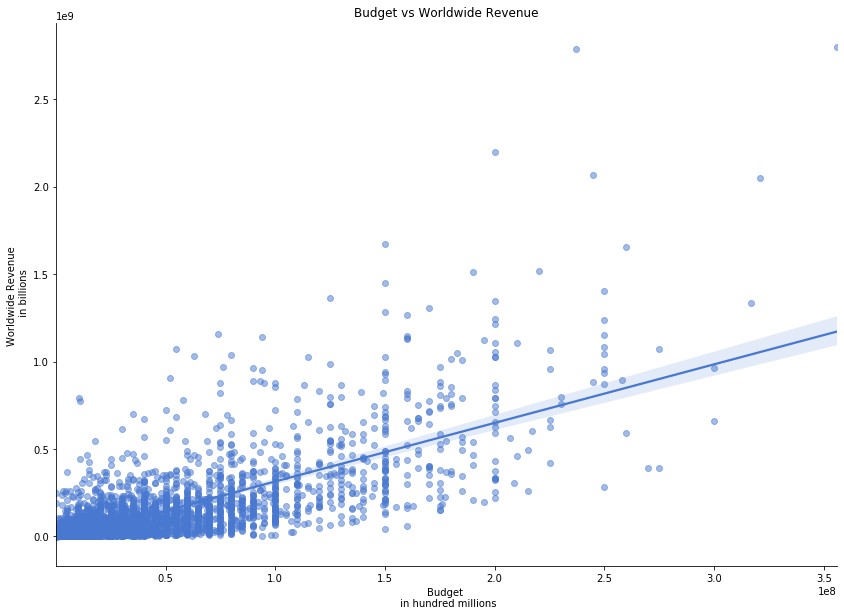

In [32]:
plt.figure(figsize=(14, 10))
sns.regplot(x = 'budget', y = 'worldwide_gross', data = pared_down, scatter_kws={'alpha':0.5})
plt.title('Budget vs Worldwide Revenue')          # Set title.
plt.xlabel("Budget \n in hundred millions")       # Set x-axis label.
plt.ylabel('Worldwide Revenue \n in billions')    # Set y-axis label.
sns.despine()

As we can see, there is a positive relationship between budget and revenue. Using our regression line, we would expect a film with budget of 150,000,000 -- or 150 million -- to return 500,000,000 -- or 0.5 billion -- in revenue. Thus a profit of 350,000,000. 

Here is the same scatter plot as a regplot for the distribution of each variable. As we can see, most movies have a budget of less than 50,000,000 and earn less than 100,000,000. 

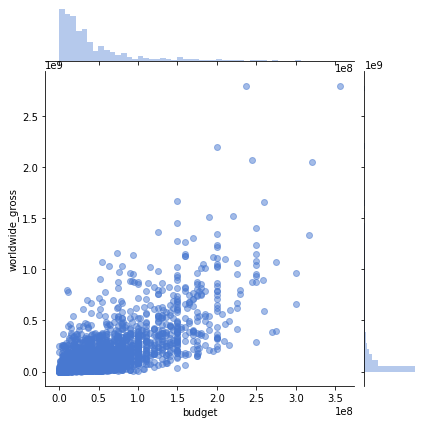

In [33]:
sns.jointplot(x = 'budget', y = 'worldwide_gross', data = pared_down, alpha = 0.5)

### Insights:

The average movie has a positive return on investment for its budget. Devoid of other factors, producers should put in as much money as they can to ensure the biggest payoff. However, this does not account for other important factors, such as release time, user and critic ratings, and competition from other films.

======================================================================================================================

# Exploratory Data Analysis: Rating and Revenue

### Libraries to import:

In [34]:
import pandas as pd
import seaborn as sns
sns.set_palette("muted")
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Load in our dataset:

In [35]:
combined = pd.read_csv('zippedData/combined.csv') # Load in our combined dataset.
combined

,Unnamed: 0,url,title,year,genre,gross_usa,budget,worldwide_gross,pg_rated,rating,rating_pop
0,0,https://www.imdb.com/title/tt0054215/,Psycho,1960,"['Horror', 'Mystery', 'Thriller']","$32,000,000","$806,947","$32,000,000",NaN,8.5,"580,863"
1,1,https://www.imdb.com/title/tt0054047/,The Magnificent Seven,1960,"['Action', 'Adventure', 'Western']",NaN,"$2,000,000",NaN,NaN,7.7,"85,315"
2,2,https://www.imdb.com/title/tt0054331/,Spartacus,1960,"['Adventure', 'Biography', 'Drama', 'History',...","$1,830,650","$12,000,000","$1,836,351",NaN,7.9,"120,895"
3,3,https://www.imdb.com/title/tt0053604/,The Apartment,1960,"['Comedy', 'Drama', 'Romance']",NaN,"$3,000,000","$177,066",NaN,8.3,"157,134"
4,4,https://www.imdb.com/title/tt0053917/,Home from the Hill,1960,"['Drama', 'Romance']",NaN,"$1,818,688",NaN,NaN,7.4,"2,864"
...,...,...,...,...,...,...,...,...,...,...,...
18295,2995,https://www.imdb.com/title/tt7541720/,Music,2020,['Drama'],NaN,NaN,NaN,PG-13,NaN,NaN
18296,2996,https://www.imdb.com/title/tt5867314/,The Empty Man,2020,"['Crime', 'Drama', 'Horror', 'Mystery', 'Thril...",NaN,NaN,NaN,R,NaN,NaN
18297,2997,https://www.imdb.com/title/tt5714470/,Come Away,2020,"['Adventure', 'Drama', 'Fantasy']",NaN,NaN,NaN,NaN,6.6,27
18298,2998,https://www.imdb.com/title/tt6559576/,Selfie Dad,2020,"['Comedy', 'Family']",NaN,NaN,NaN,PG,3.7,83


### Data Cleaning:

We are concatenating several dataframes so their indexes are shared. We reset the index so they are unique.

In [36]:
combined.reset_index(inplace=True) # Reset index due to concatenation.

Now we have to remove the extra column of old indexes.

In [37]:
combined = combined.drop('Unnamed: 0', axis=1)  # Remove extra index column from resetting index. 

Let's make sure that our changes have been successful.

In [38]:
combined # Examine changes.

,index,url,title,year,genre,gross_usa,budget,worldwide_gross,pg_rated,rating,rating_pop
0,0,https://www.imdb.com/title/tt0054215/,Psycho,1960,"['Horror', 'Mystery', 'Thriller']","$32,000,000","$806,947","$32,000,000",NaN,8.5,"580,863"
1,1,https://www.imdb.com/title/tt0054047/,The Magnificent Seven,1960,"['Action', 'Adventure', 'Western']",NaN,"$2,000,000",NaN,NaN,7.7,"85,315"
2,2,https://www.imdb.com/title/tt0054331/,Spartacus,1960,"['Adventure', 'Biography', 'Drama', 'History',...","$1,830,650","$12,000,000","$1,836,351",NaN,7.9,"120,895"
3,3,https://www.imdb.com/title/tt0053604/,The Apartment,1960,"['Comedy', 'Drama', 'Romance']",NaN,"$3,000,000","$177,066",NaN,8.3,"157,134"
4,4,https://www.imdb.com/title/tt0053917/,Home from the Hill,1960,"['Drama', 'Romance']",NaN,"$1,818,688",NaN,NaN,7.4,"2,864"
...,...,...,...,...,...,...,...,...,...,...,...
18295,18295,https://www.imdb.com/title/tt7541720/,Music,2020,['Drama'],NaN,NaN,NaN,PG-13,NaN,NaN
18296,18296,https://www.imdb.com/title/tt5867314/,The Empty Man,2020,"['Crime', 'Drama', 'Horror', 'Mystery', 'Thril...",NaN,NaN,NaN,R,NaN,NaN
18297,18297,https://www.imdb.com/title/tt5714470/,Come Away,2020,"['Adventure', 'Drama', 'Fantasy']",NaN,NaN,NaN,NaN,6.6,27
18298,18298,https://www.imdb.com/title/tt6559576/,Selfie Dad,2020,"['Comedy', 'Family']",NaN,NaN,NaN,PG,3.7,83



For visualization we need our rating to be a numerical value so we will do an explicit type check to make sure.

In [39]:
combined.rating.dtype # Confirm the rating is numeric type.

dtype('float64')

Cleaning our rating and rating_pop columns by removing commas and any missing values in either column.

In [40]:
combined['rating_pop'] = combined.rating_pop.str.replace(',', '') # Remove commas.
combined.dropna(inplace = True, subset=['rating', 'rating_pop'])  # Remove missing values from rating and rating_pop.
combined                                                          #

,index,url,title,year,genre,gross_usa,budget,worldwide_gross,pg_rated,rating,rating_pop
0,0,https://www.imdb.com/title/tt0054215/,Psycho,1960,"['Horror', 'Mystery', 'Thriller']","$32,000,000","$806,947","$32,000,000",NaN,8.5,580863
1,1,https://www.imdb.com/title/tt0054047/,The Magnificent Seven,1960,"['Action', 'Adventure', 'Western']",NaN,"$2,000,000",NaN,NaN,7.7,85315
2,2,https://www.imdb.com/title/tt0054331/,Spartacus,1960,"['Adventure', 'Biography', 'Drama', 'History',...","$1,830,650","$12,000,000","$1,836,351",NaN,7.9,120895
3,3,https://www.imdb.com/title/tt0053604/,The Apartment,1960,"['Comedy', 'Drama', 'Romance']",NaN,"$3,000,000","$177,066",NaN,8.3,157134
4,4,https://www.imdb.com/title/tt0053917/,Home from the Hill,1960,"['Drama', 'Romance']",NaN,"$1,818,688",NaN,NaN,7.4,2864
...,...,...,...,...,...,...,...,...,...,...,...
18291,18291,https://www.imdb.com/title/tt10370380/,The Windermere Children,2020,"['Drama', 'War']",NaN,NaN,NaN,NaN,7.3,1577
18292,18292,https://www.imdb.com/title/tt11127878/,Milea,2020,"['Drama', 'Romance']",NaN,NaN,NaN,NaN,6.2,187
18293,18293,https://www.imdb.com/title/tt11358398/,The Man Standing Next,2020,"['History', 'Thriller']","$113,527",NaN,"$34,664,900",NaN,7.0,822
18297,18297,https://www.imdb.com/title/tt5714470/,Come Away,2020,"['Adventure', 'Drama', 'Fantasy']",NaN,NaN,NaN,NaN,6.6,27


### Data Visualization for Rating Distribution:

Now we get to start visualizing. Let's plot the distribution of user ratings.

Text(6.55, 0.1, 'Breakeven Point')

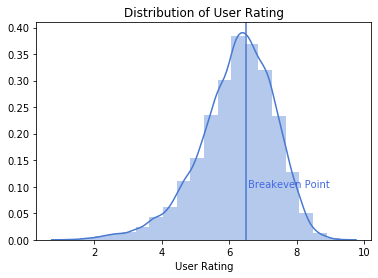

In [41]:
sns.distplot(combined.rating, bins = 20)                  # Plot movie rating distribution. 
plt.title('Distribution of User Rating')                  # Set title.
plt.xlabel('User Rating')                                 # Set x-axis label.
plt.axvline(x = 6.5)                                      # Create a vertical line at the breakeven point.
plt.text(6.55,0.1,'Breakeven Point', color = 'royalblue') # Create text on graph.

As we can see, the mean user rating is about a 6.25 out of 10. And there's a slight negative skew, possibly because users are more likely to go and rate movies they didn't like, and 10 out of 10 reviews are very rare.

### Data Cleaning P.2: Incorporating Revenue

Now let's try to incorporate worldwide gross revenue and see how it relates to a movie's rating.

We need to drop missing values from the worldwide_gross column.

In [42]:
combined_gross = combined.dropna(subset=['worldwide_gross']) # Drop missing values from worldwide gross. 

Now let's clean the remaining entries by removing commas and stripping the dollar signs. 

In [43]:
combined_gross['worldwide_gross'] = combined_gross.worldwide_gross.str.replace(',', '') # Remove commas and dollar 
combined_gross['worldwide_gross'] = combined_gross.worldwide_gross.str.strip('$')       # signs. 

/Users/arencarpenter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/arencarpenter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Examine our changes. Looking good. 

In [44]:
combined_gross # Examine changes.

,index,url,title,year,genre,gross_usa,budget,worldwide_gross,pg_rated,rating,rating_pop
0,0,https://www.imdb.com/title/tt0054215/,Psycho,1960,"['Horror', 'Mystery', 'Thriller']","$32,000,000","$806,947",32000000,NaN,8.5,580863
2,2,https://www.imdb.com/title/tt0054331/,Spartacus,1960,"['Adventure', 'Biography', 'Drama', 'History',...","$1,830,650","$12,000,000",1836351,NaN,7.9,120895
3,3,https://www.imdb.com/title/tt0053604/,The Apartment,1960,"['Comedy', 'Drama', 'Romance']",NaN,"$3,000,000",177066,NaN,8.3,157134
5,5,https://www.imdb.com/title/tt0054357/,Swiss Family Robinson,1960,"['Adventure', 'Family']","$40,356,000","$5,000,000",40356000,NaN,7.2,13620
7,7,https://www.imdb.com/title/tt0053779/,La Dolce Vita,1960,"['Comedy', 'Drama']",NaN,NaN,171140,NaN,8.0,63887
...,...,...,...,...,...,...,...,...,...,...,...
18277,18277,https://www.imdb.com/title/tt9537292/,Ala Vaikunthapurramuloo,2020,"['Action', 'Drama']",NaN,NaN,631683,NaN,7.2,5734
18280,18280,https://www.imdb.com/title/tt10816484/,18 Presents,2020,['Drama'],NaN,"EUR2,500,000",3486375,NaN,6.7,1952
18282,18282,https://www.imdb.com/title/tt8415352/,The Murder of Nicole Brown Simpson,2020,"['Crime', 'Thriller']",NaN,NaN,8931,R,2.2,789
18290,18290,https://www.imdb.com/title/tt7095476/,Waiting for Anya,2020,"['Drama', 'Thriller', 'War']",NaN,"$10,000,000",36404,NaN,5.6,431


Now that we have removed special characters we need to recast the column from an object 'O' to an 'int64'.

In [45]:
combined_gross.worldwide_gross.dtype # Worldwide gross is 'object' type. Need to recast as numeric. 

dtype('O')

We also had two non-USD entries that we removed manually. 

In [46]:
combined_gross.worldwide_gross.drop([11895, 12556], axis=0, inplace=True) # This throws a warning because altering a
                                                                          # copy of the original dataframe. But let the
                                                                          # change go through.

/Users/arencarpenter/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:3939: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(obj)


In [47]:
combined_gross

,index,url,title,year,genre,gross_usa,budget,worldwide_gross,pg_rated,rating,rating_pop
0,0,https://www.imdb.com/title/tt0054215/,Psycho,1960,"['Horror', 'Mystery', 'Thriller']","$32,000,000","$806,947",32000000,NaN,8.5,580863
2,2,https://www.imdb.com/title/tt0054331/,Spartacus,1960,"['Adventure', 'Biography', 'Drama', 'History',...","$1,830,650","$12,000,000",1836351,NaN,7.9,120895
3,3,https://www.imdb.com/title/tt0053604/,The Apartment,1960,"['Comedy', 'Drama', 'Romance']",NaN,"$3,000,000",177066,NaN,8.3,157134
5,5,https://www.imdb.com/title/tt0054357/,Swiss Family Robinson,1960,"['Adventure', 'Family']","$40,356,000","$5,000,000",40356000,NaN,7.2,13620
7,7,https://www.imdb.com/title/tt0053779/,La Dolce Vita,1960,"['Comedy', 'Drama']",NaN,NaN,171140,NaN,8.0,63887
...,...,...,...,...,...,...,...,...,...,...,...
18277,18277,https://www.imdb.com/title/tt9537292/,Ala Vaikunthapurramuloo,2020,"['Action', 'Drama']",NaN,NaN,631683,NaN,7.2,5734
18280,18280,https://www.imdb.com/title/tt10816484/,18 Presents,2020,['Drama'],NaN,"EUR2,500,000",3486375,NaN,6.7,1952
18282,18282,https://www.imdb.com/title/tt8415352/,The Murder of Nicole Brown Simpson,2020,"['Crime', 'Thriller']",NaN,NaN,8931,R,2.2,789
18290,18290,https://www.imdb.com/title/tt7095476/,Waiting for Anya,2020,"['Drama', 'Thriller', 'War']",NaN,"$10,000,000",36404,NaN,5.6,431


Now we can recast the column. 

In [48]:
combined_gross['worldwide_gross'] = combined_gross.worldwide_gross.astype('int64') # This throws a warning due to
                                                                                   # altering a copy of the dataframe.

/Users/arencarpenter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


And we can confirm the data type of the column is now a numerical value. 

In [49]:
combined_gross.worldwide_gross.dtype # Confirm that worldwide_gross is numerical.

dtype('float64')

### Data Visualization:

Now we can visualize the average worldwide gross revenue for each user rating. 

Text(48.5, 200000000, 'Breakeven Point')

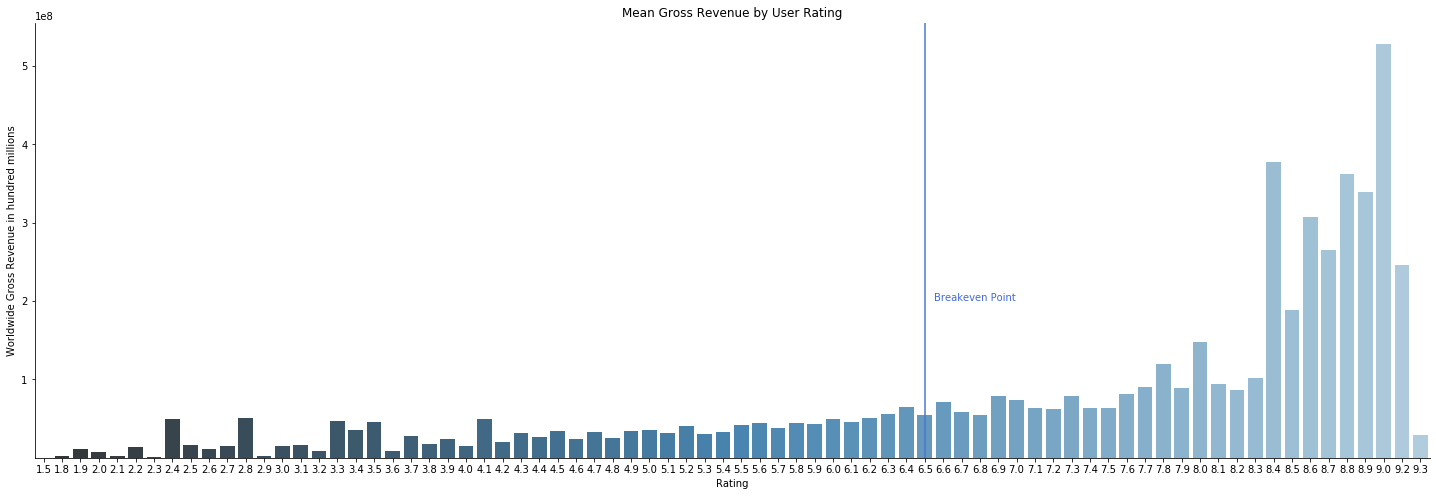

In [50]:
plt.figure(figsize=(25, 8))                                     # Set figure size. 
sns.barplot(x = 'rating', y = 'worldwide_gross', data = combined_gross, ci=None, palette='Blues_d')
plt.yticks(np.arange(100000000, 600000000, 100000000))          # Setting axis labels and ticks. 
plt.title('Mean Gross Revenue by User Rating')                  # 
plt.ylabel('Worldwide Gross Revenue in hundred millions')       #
plt.xlabel('Rating')                                            #
sns.despine()                                                   #
plt.axvline(x = 48)                                             # There are 76 x values, hence 48 aligning with a 6.5 
plt.text(48.5,200000000,'Breakeven Point', color = 'royalblue') # rating (breakeven rating).

Movies that are rated poorly do not have high worldwide gross revenue. We also transposed our calculated breakeven point rating of 6.5 unto this graph. On average, movies that score a user rating above this threshold earn a profit. And at the extreme, movies that score a 8.4 or above have very high revenues. 

### Insights:

The average movie has a user rating on IMDB of about 6 out of 10. Comparing the respective budgets versus worldwide gross revenue suggests that movies with a user rating of 6.5 or greater have a positive return on investment. The key insights from this data are, that with an average rating of about 6 and the mean breakeven point being 6.5, about as many movies lose money as make money. Movies that make their budget back should have a rating greater than 6.5. That is, you should aim to make a highly rated film. While this seems obvious, there have been many examples of big summer blockbusters that flop at the box office due to poor reviews even with ample budget. 

======================================================================================================================

## Exploratory Data Analysis: Genres and Revenue

The type of movies that people deem popular today will change over time. With this assumption that genres trend over the years, we will explore how genres can play a part in revenue and how the distribution of popular genres have changed.

### Libraries to Import

In [51]:
import pandas as pd
import numpy as np
import ast
from tqdm import tqdm

import seaborn as sns
sns.set_palette("muted")

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import linregress

### Import Data

Import our dataset of scraped IMDB data. 

In [54]:
df = pd.read_csv('zippedData/combined.csv',index_col=0)

### Defining Functions

In [55]:
def genre_counter(dataframe):
    '''
    Returns a dictionary of counts by iterating over dataframe['genre_list'].
    '''
    m = {}
    
    for i in dataframe['genre_list']:
        for x in i:
            if x not in m:
                m[x] = 1
            else:
                m[x] += 1
    
    sorted_m = {k: v for k,v in sorted(m.items(), key=lambda item: item[1], reverse=True)}
    
    return sorted_m

In [56]:
def cleaned_genre(dataframe):
    '''
    Returns dataframe with genre dummy columns.
    Genres Counted:['Horror', 'Mystery', 'Thriller', 'Action', 'Adventure', 'Western',
                    'Biography', 'Drama', 'History', 'War', 'Comedy', 'Romance',
                    'Family', 'Fantasy', 'Sci-Fi', 'Crime', 'Music', 'Sport', 'Musical', 'Animation']
    '''
    dataframe.dropna(subset=['genre'],axis=0,inplace=True)                               #drop rows with missing genre
    dataframe.reset_index(drop=True,inplace=True)                                        #need to reset_index before we select drop
    
    dataframe.drop(dataframe[dataframe['genre'].str.contains('See All')].index,axis=0,inplace=True)    #drop rows with genre containing 'Adult' or 'See All'
    dataframe.drop(dataframe[dataframe['genre'].str.contains('Adult')].index,axis=0,inplace=True)      #7 rows with genre containing 'Adult' or 'See All'
    dataframe.reset_index(drop=True,inplace=True)
    
    _list = []
    for i in dataframe['genre']:            #genre column contains list-like strings
        _list.append(ast.literal_eval(i))   #ast can convert these strings into actual lists
    
    dataframe['genre_list'] = _list
    
    m = genre_counter(dataframe)      # m will return dict- key(genre) with value(count)
    genre_category = list(m.keys())
    
    for i in genre_category:   #creating dummy variables with 0
        dataframe[i] = 0       #
    
    print('iterating over 18288 rows')
    for i, x in tqdm(enumerate(dataframe['genre_list'])):
        for each in x:
            dataframe.loc[i, each] = 1
    print('done')
    
    return dataframe

In [57]:
def cleaned_gross_minus_budget(dataframe):
    '''
    Returns cleaned dataframe by: dropping rows with missing 'budget' and 'worldwide-gross', 
    creating new column for 'gross_minus_budget' representing net profits.
    '''
    _df = cleaned_genre(dataframe)   # Make a copy of the dataframe.
    combined = _df.copy()
    
    combined['worldwide_gross'] = combined['worldwide_gross'].str.strip('$')        # Remove $ and commas for...
    combined['worldwide_gross'] = combined['worldwide_gross'].str.replace(',', '')  # worldwide_gross, 
                                                                                    #
    combined['budget'] = combined['budget'].str.strip('$')                          # budget,
    combined['budget'] = combined['budget'].str.replace(',', '')                    #
                                                                                    #
    combined['gross_usa'] = combined['gross_usa'].str.strip('$')                    # and gross_usa.
    combined['gross_usa'] = combined['gross_usa'].str.replace(',', '')              #
    
    
    combined = combined[~combined['budget'].astype(str).str.startswith('SEK')] # Format is redefine the column with all
    combined = combined[~combined['budget'].astype(str).str.startswith('NOK')] # entries EXCEPT where the entry starts
    combined = combined[~combined['budget'].astype(str).str.startswith('KRW')] # with the specified currency string.
    combined = combined[~combined['budget'].astype(str).str.startswith('SGD')]
    combined = combined[~combined['budget'].astype(str).str.startswith('THB')]
    combined = combined[~combined['budget'].astype(str).str.startswith('JPY')]
    combined = combined[~combined['budget'].astype(str).str.startswith('HUF')]
    combined = combined[~combined['budget'].astype(str).str.startswith('INR')]
    combined = combined[~combined['budget'].astype(str).str.startswith('GBP')]
    combined = combined[~combined['budget'].astype(str).str.startswith('HKD')]
    combined = combined[~combined['budget'].astype(str).str.startswith('FRF')]
    combined = combined[~combined['budget'].astype(str).str.startswith('EUR')]
    combined = combined[~combined['budget'].astype(str).str.startswith('FIM')]
    combined = combined[~combined['budget'].astype(str).str.startswith('DEM')]
    combined = combined[~combined['budget'].astype(str).str.startswith('DKK')]
    combined = combined[~combined['budget'].astype(str).str.startswith('CAD')]
    combined = combined[~combined['budget'].astype(str).str.startswith('ESP')]
    combined = combined[~combined['budget'].astype(str).str.startswith('AUD')]
    combined = combined[~combined['budget'].astype(str).str.startswith('BEF')]
    combined = combined[~combined['budget'].astype(str).str.startswith('CNY')]
    combined = combined[~combined['budget'].astype(str).str.startswith('ATS')]
    combined = combined[~combined['budget'].astype(str).str.startswith('BRL')]
    combined = combined[~combined['budget'].astype(str).str.startswith('BRL')]
    combined = combined[~combined['budget'].astype(str).str.startswith('ITL')]
    combined = combined[~combined['budget'].astype(str).str.startswith('RUR')]
    combined = combined[~combined['budget'].astype(str).str.startswith('IEP')]
    combined = combined[~combined['budget'].astype(str).str.startswith('TRL')]
    
    _albert = combined.dropna(subset=['budget','worldwide_gross'],axis=0).copy()   # Drop missing values.
    _albert['budget'] = _albert['budget'].astype('int64')                          # Recast budget as int64.
    _albert['worldwide_gross'] = _albert['worldwide_gross'].astype('int64')        # Recast worldwide_gross as int64.
    
    _albert['gross_minus_budget'] = _albert['worldwide_gross'] - _albert['budget'] # New column as revenue - budget.
    
    print('dropped 11889 rows. final shape: ',_albert.shape)
    return _albert

In [58]:
def find_linregress_slope_dist(dataframe):
    '''
    x = years, y = percentage of movies that contain genre
    Returns a list of tuples of (dist, genre).
    ex: [(0.005,Thriller),(0.004,Drama)...]
    '''
    m = genre_counter(dataframe)
    genre_category = list(m.keys())
    
    _albert = []                                                          # Create empty list.
    for i in genre_category:                                              # For each genre...
        _sample_df = dataframe.groupby(['year'])[i].mean().reset_index()  # get dist of genre in that year
        _linregress = linregress(_sample_df['year'], _sample_df[i])[0]    # get the slope
        _albert.append((_linregress,i))                                   # append slope and genre.
    
    _albert.sort(key = lambda x: x[0], reverse = True)
    return _albert

In [59]:
def plot_genre_distribution(m):
    plt.figure(figsize=(20,10))
    plt.bar(list(m.keys()), m.values())
    plt.ylabel('Count')
    plt.xlabel('Genres')
    plt.title('Overall Genre Distribution')
    sns.despine()
    plt.show()

#### Assigning _genre to be dataframe containing genre dummy variables

In [60]:
_genre = cleaned_genre(df)

131it [00:00, 1308.86it/s]

iterating over 18288 rows


18288it [00:14, 1278.61it/s]

done


#### Assigning m to be a dictionary of genres and total counts per genre

In [61]:
m = genre_counter(_genre)

#### Overall Genre Distribution
##### Important: 
> IMDB lists multipled genres for movies where applicable. For example, Pixar's "Inside Out" is classified as an "Animation, Adventure, Comedy" and would therefore be counted as an entry in those 3 genres individually. Thus our analysis is geared toward finding the most profitable genres with the assumption that movies can combine genres.

Let's start by graphing genre popularity via the count of movies who share each tag. Note that this is an aggregate of all movies over the 80 years sampled. The actual change in popularity of each genre will be discussed later. 

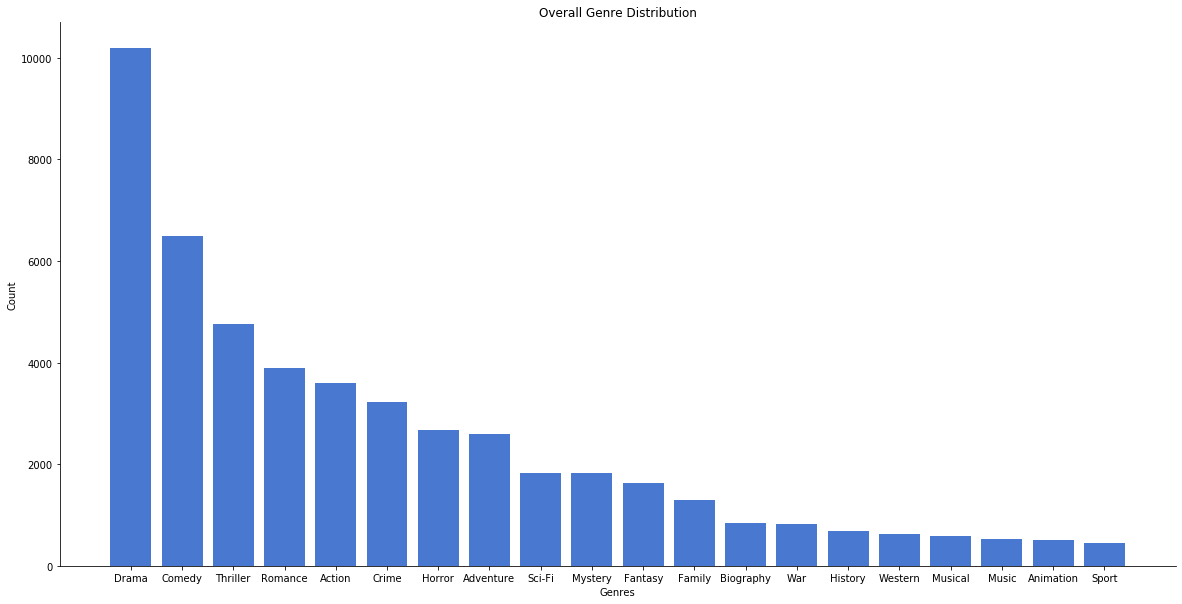

In [62]:
plot_genre_distribution(m)

### Insights:

We see that Dramas are the most prolific genre throughout the history of film with more than 10,000 entries out of our 18,000 movies sampled. Comedy is second with about 1/3 of movies using this tag. This should not be unexpected as drama and comedies are over-arching genres, that is other genres can be easily paired with these, i.e. Romantic Comedies or Historical Dramas. However, tastes change, so let's look at what genres have been on the rise and those who are falling from popularity. 

### Genre Popularity over Time

In [63]:
def plot_top_worst_dist(dataframe):
    
    _linregress = find_linregress_slope_dist(dataframe) # Use function to find slope of frequency for genre.

    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,10))     # Create figure with subplots.

    ax_1 = axes[0]
    _df = dataframe.groupby(['year'])[_linregress[0][1]].mean()   # Select data.
    sns.lineplot(x=list(_df.index), y=_df.values, ax= ax_1)        # Plot with x and y.
    
    ax_1.set_ylabel('Distribution')                               # Set x-axis label.
    ax_1.set_xlabel('Year')                                       # Set y-axis label.
    ax_1.set_title('Largest Positive Change: '+_linregress[0][1]) # Set Axis title.
    ax_1.set_ylim(0,0.7)                                          # Set range of y values. 

    ax_2 = axes[1]                                                # Same as Axis[0]
    _df = dataframe.groupby(['year'])[_linregress[-1][1]].mean()
    sns.lineplot(x=list(_df.index), y=_df.values, ax= ax_2)
    
    ax_2.set_ylabel('Distribution')
    ax_2.set_xlabel('Year')
    ax_2.set_title('Largest Negative Change: '+_linregress[-1][1])
    ax_2.set_ylim(0,0.7)

#### Largest Positive Change vs Largest Negative Change


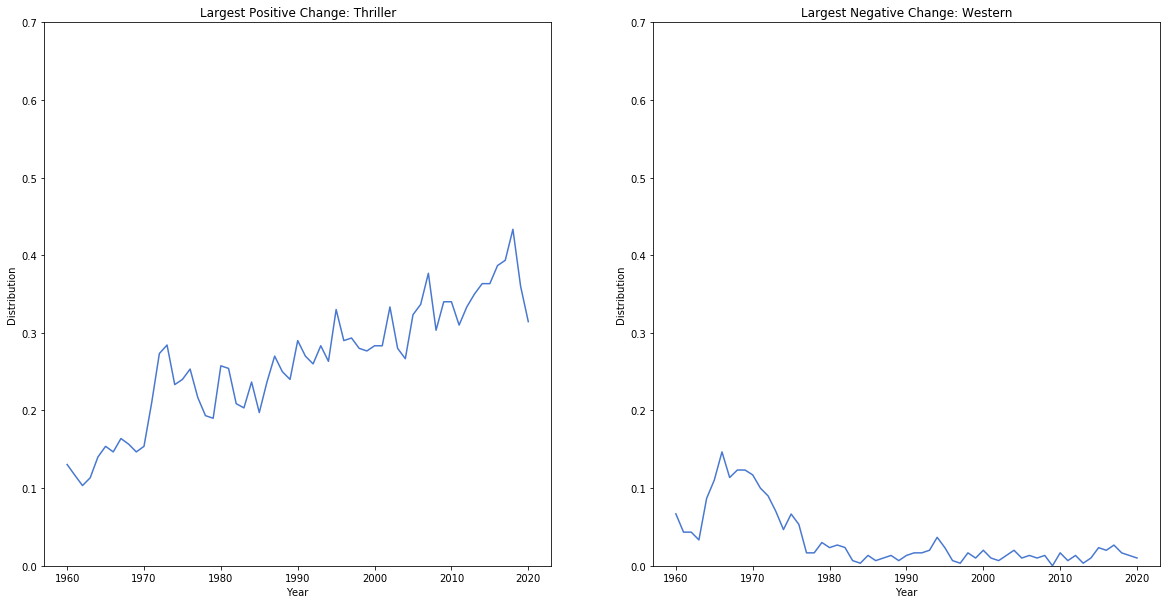

In [64]:
plot_top_worst_dist(_genre)

### Insights:

Y-axis represents the percentage of movies per year that contains the specified genre tag. For example: In 1960, only 13% of the movies contained the 'Thriller' tag, but in 2019, more than 40% of the most popular 300 movies were classified as 'Thriller'. 

>"When television became popular in the late 1940s and 1950s, TV westerns quickly became an audience favorite, with 30 such shows airing during prime-time in 1959. Traditional Westerns faded in popularity in the late 1960s..." -https://en.wikipedia.org/wiki/Westerns_on_television </br>

'Westerns' on the other hand have fallen from popularity after the age of the Spaghetti Western in the mid-1960s. Since then, less than 5% of the most popular movies have been 'Westerns', and these include movies like "Django Unchained" directed by Quentin Tarintino which are not the typical 'Western' movie. 



#### Assigning cleaned_gross to be the CLEANED imported dataframe with dummy genre variables

In [65]:
cleaned_gross = cleaned_gross_minus_budget(df)

143it [00:00, 1415.88it/s]

iterating over 18288 rows


18288it [00:14, 1295.18it/s]


done
dropped 11889 rows. final shape:  (6399, 32)


### Creating a helper function to find the regression slope of Genre specific net income per year

In [66]:
def find_linregress_slope_gross(dataframe):
    '''
    x = years, y = gross_minus_budget
    Returns a list of tuples of (slope, genre).
    ex: [(4428902,Thriller),(125214,Drama)...]
    '''
    m = genre_counter(dataframe)    # Similiar to previous function but returns slope instead of distribution.
    genre_category = list(m.keys())
    
    _albert = []                                                                               # Create empty list.
    for i in genre_category:                                                                   # Iterate through genres.
        _albert_yes = dataframe.loc[dataframe[i] == 1]
        _sample_df = _albert_yes.groupby(['year'])['gross_minus_budget'].mean().reset_index()  # Group by year and grab profit.
        _linregress = linregress(_sample_df['year'], _sample_df['gross_minus_budget'])[0]      # Grabs profit column for each genre.
        _albert.append((_linregress,i))                                                        # Append to list.
    
    _albert.sort(key = lambda x: x[0], reverse = True)
    return _albert

#### Having a sorted list of slope and Genre Name will help us choose which Genres to plot

In [67]:
gross_slope = find_linregress_slope_gross(cleaned_gross)

In [68]:
gross_slope

[(4428902.01593712, 'Animation'),
 (4392300.607497364, 'Musical'),
 (3905571.592722525, 'Adventure'),
 (3364200.4461238435, 'Fantasy'),
 (3304892.017566035, 'Sci-Fi'),
 (2689759.9678901974, 'Family'),
 (2357560.010897966, 'Action'),
 (1665891.8092986054, 'Music'),
 (1500153.499897386, 'Comedy'),
 (1364146.177246614, 'Mystery'),
 (1091141.068143111, 'Thriller'),
 (1021392.3278442413, 'War'),
 (975584.9045584836, 'Romance'),
 (880651.0098206727, 'Crime'),
 (870414.6509338833, 'History'),
 (718899.579357285, 'Horror'),
 (629027.9987008005, 'Drama'),
 (375519.70506954344, 'Western'),
 (183812.47464667555, 'Sport'),
 (76771.23079767723, 'Biography')]

#### Assigning a new column to the dataframe called 'year_bins' 
Assign each individual year to a new bin of its respective decade.

In [69]:
albert_trimmed = cleaned_gross.copy()

In [70]:
cut_labels = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
cut_bins = [1950,1969,1979,1989,1999,2009,2025]
albert_trimmed['year_bins'] = pd.cut(albert_trimmed['year'], bins=cut_bins, labels=cut_labels)

#### Plotting Net Income over time; comparing Specific (Top) Genres vs Not

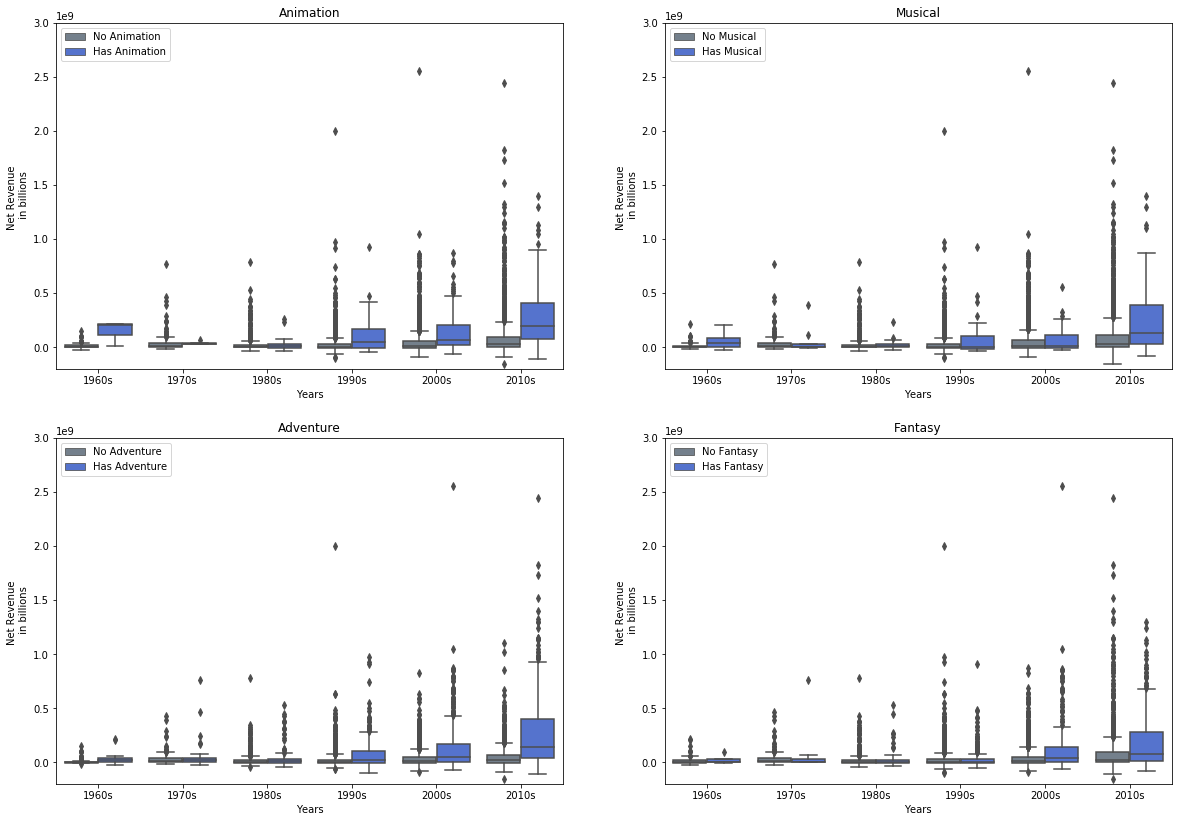

In [71]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(20,14))                  # Create figure with 2x2 subplots.

########## Upper Left ##########
ax_1 = axes[0][0]                                                          
sns.boxplot(x='year_bins',y='gross_minus_budget',hue='Animation', data = albert_trimmed, ax= ax_1, palette = ["slategray","royalblue"])

handles, _ = ax_1.get_legend_handles_labels()
ax_1.legend(loc='upper left',handles=handles,labels=["No Animation", "Has Animation"])              # Set legend location.
ax_1.set_ylabel('Net Revenue \n in billions')   # Set y-axis label.
ax_1.set_title(gross_slope[0][1])               # Set title.
ax_1.set_ylim(-200_000_000,3_000_000_000)       # Set range of y-axis.
ax_1.set_xlabel('Years')                        # Set x-axis label.

########## Upper Right ##########
ax_2 = axes[0][1]
sns.boxplot(x='year_bins',y='gross_minus_budget',hue='Musical', data = albert_trimmed, ax= ax_2, palette = ["slategray","royalblue"])

handles, _ = ax_2.get_legend_handles_labels()
ax_2.legend(loc='upper left',handles = handles, labels=["No Musical", "Has Musical"])
ax_2.set_ylabel('Net Revenue \n in billions')   # Set y-axis label.
ax_2.set_title(gross_slope[1][1])               # Set title.
ax_2.set_ylim(-200_000_000,3_000_000_000)       # Set range of y-axis.
ax_2.set_xlabel('Years')                        # Set x-axis label.

########## Lower Left ##########
ax_3 = axes[1][0]
sns.boxplot(x='year_bins',y='gross_minus_budget',hue='Adventure', data = albert_trimmed, ax= ax_3, palette = ["slategray","royalblue"])

handles, _ = ax_3.get_legend_handles_labels()
ax_3.legend(loc='upper left',handles = handles,labels=["No Adventure", "Has Adventure"])
ax_3.set_ylabel('Net Revenue \n in billions')   # Set y-axis label.
ax_3.set_title(gross_slope[2][1])               # Set title.
ax_3.set_ylim(-200_000_000,3_000_000_000)       # Set range of y-axis.
ax_3.set_xlabel('Years')                        # Set x-axis label.

########## Lower Right ##########
ax_4 = axes[1][1]
sns.boxplot(x='year_bins',y='gross_minus_budget',hue='Fantasy', data = albert_trimmed, ax= ax_4, palette = ["slategray","royalblue"])

handles, _ = ax_4.get_legend_handles_labels()
ax_4.legend(loc='upper left',handles = handles,labels=["No Fantasy", "Has Fantasy"])
ax_4.set_ylabel('Net Revenue \n in billions')   # Set y-axis label.
ax_4.set_title(gross_slope[3][1])               # Set title.
ax_4.set_ylim(-200_000_000,3_000_000_000)       # Set range of y-axis.
ax_4.set_xlabel('Years');                       # Set x-axis label.

### Insights:

Because movies can have multiple genre tags, our legend shows "Has [Genre]" and that selection includes all movies that contain that tag. These are the four fastest growing genres defined by the slope of their popularity over time. We would predict that movies utilizing one or more of these genres would be capitalizing on the current state of the film industry and have the greatest return on investment and please audiences. 

#### Plotting Net Income over time; comparing Specific (Bottom) Genres vs Not

Text(0.5, 0, 'Years')

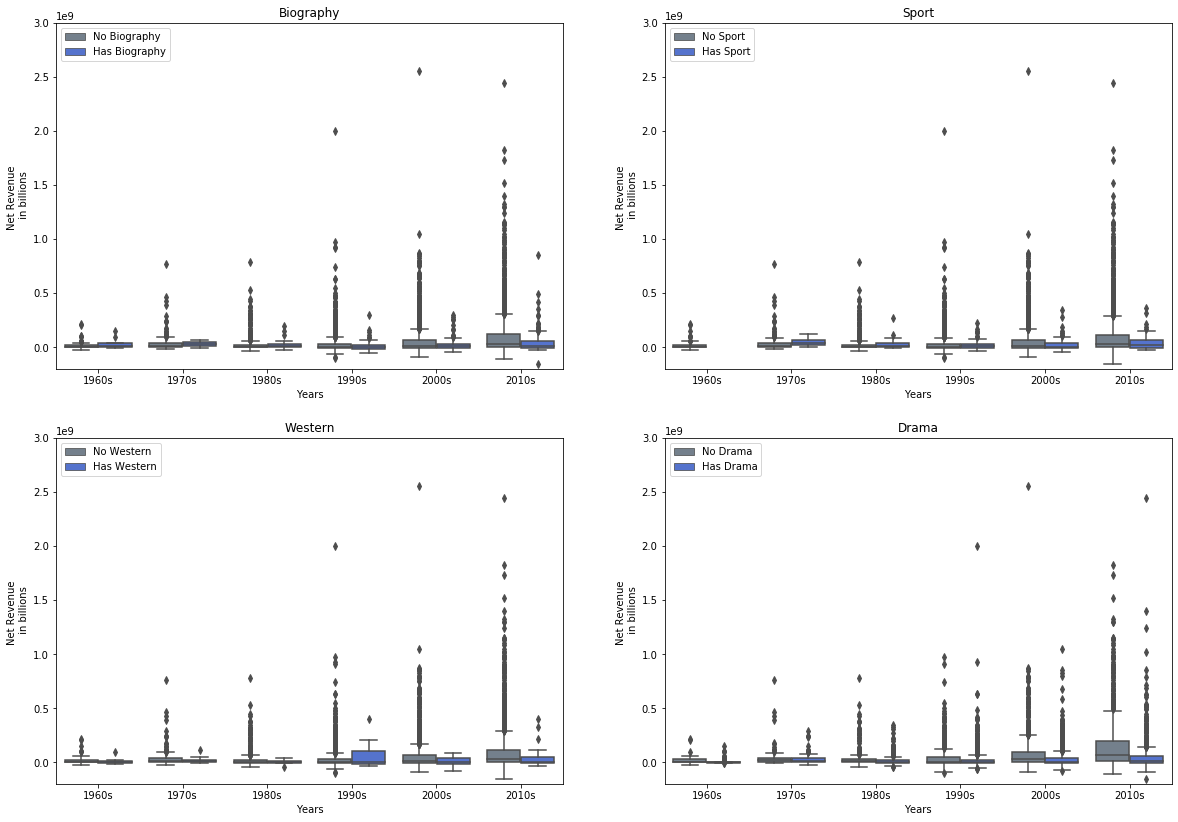

In [73]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(20,14))   # Create figure with 2x2 subplots.

########## Upper Left ##########
ax_1 = axes[0][0]
sns.boxplot(x='year_bins',y='gross_minus_budget',hue='Biography', data = albert_trimmed, ax= ax_1, palette=["slategray","royalblue"])

handles, _ = ax_1.get_legend_handles_labels()
ax_1.legend(loc='upper left',handles=handles,labels=["No Biography", "Has Biography"])
ax_1.set_ylabel('Net Revenue \n in billions')   # Set y-axis label.
ax_1.set_title('Biography')                     # Set title.
ax_1.set_ylim(-200_000_000,3_000_000_000)       # Set range of y-axis.
ax_1.set_xlabel('Years')                        # Set x-axis label.

########## Upper Right ##########
ax_2 = axes[0][1]
sns.boxplot(x='year_bins',y='gross_minus_budget',hue='Sport', data = albert_trimmed, ax= ax_2, palette = ["slategray","royalblue"])

handles, _ = ax_2.get_legend_handles_labels()
ax_2.legend(loc='upper left',handles = handles, labels=["No Sport", "Has Sport"])
ax_2.set_ylabel('Net Revenue \n in billions')   # Set y-axis label.
ax_2.set_title('Sport')                         # Set title.
ax_2.set_ylim(-200_000_000,3_000_000_000)       # Set range of y-axis.
ax_2.set_xlabel('Years')                        # Set x-axis label.

########## Lower Left ##########
ax_3 = axes[1][0]
sns.boxplot(x='year_bins',y='gross_minus_budget',hue='Western', data = albert_trimmed, ax= ax_3, palette = ["slategray","royalblue"])

handles, _ = ax_3.get_legend_handles_labels()
ax_3.legend(loc='upper left',handles = handles,labels=["No Western", "Has Western"])
ax_3.set_ylabel('Net Revenue \n in billions')   # Set y-axis label.
ax_3.set_title('Western')                       # Set title. 
ax_3.set_ylim(-200_000_000,3_000_000_000)       # Set range of y-axis.
ax_3.set_xlabel('Years')                        # Set x-axis label.

########## Lower Right ##########
ax_4 = axes[1][1]
sns.boxplot(x='year_bins',y='gross_minus_budget',hue='Drama', data = albert_trimmed, ax= ax_4, palette = ["slategray","royalblue"])

handles, _ = ax_4.get_legend_handles_labels()
ax_4.legend(loc='upper left',handles = handles,labels=["No Drama", "Has Drama"])
ax_4.set_ylabel('Net Revenue \n in billions')   # Set y-axis label.
ax_4.set_title('Drama')                         # Set title. 
ax_4.set_ylim(-200_000_000,3_000_000_000)       # Set range of y-axis.
ax_4.set_xlabel('Years')                        # Set x-axis label.

### Insights:

On the other side, these genres have shown the largest decrease in popularity over time. Many of these are niche genres that have never been incredibly popular, see 'Sports' and 'Western' genres. However, 'Drama' may be unexpected as it was the overall most popular genre from our first visualization. We hypothesize that because 'Drama' was very popular in the past it could only lose market share as other genres gained in popularity. Additionally, as 'Dramas' are generally slower and more serious, they less often generate large amounts of interest and thus rarely do we see 'Drama' blockbusters.